In [21]:
# need to clean data first
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv("NYPD_Arrests_Data__Historic_.csv",low_memory = False)
df = df.dropna(subset=['PD_DESC','OFNS_DESC'])
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
#removed rows with latitude less than 41 because outside of new york city boroughs
df = df.loc[df['Latitude']<41]
#convert ARREST_DATE column to a datetime type
df_years={}
for i in range(2006,2021):
    df_years[i] = df[df['ARREST_DATE'].dt.year == i]

In [2]:
boro = df.sort_values(by=['ARREST_BORO'])

In [3]:
# sorts by arrest date -- oldest to newest
date = df.sort_values(by=['ARREST_DATE'])

In [19]:
# need to specify start and end dates that we want to include
start_date = "01/01/2020"
end_date = "12/01/2020"
# filters by the range above
mask = (df['ARREST_DATE'] >= start_date) & (df['ARREST_DATE'] <= end_date)
# locates rows and makes dataframe called df2 --> sort by descending dates (oldest to newest)
df2 = df.loc[mask].sort_values(by = ["ARREST_DATE"])

In [20]:
'''
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
         '2014', '2015', '2016', '2017', '2018', '2019', '2020']
df_years = {}
for yr in years:
    start_date = "01/01/" + yr
    end_date = "12/31/" + yr
    # filters by the range above
    mask = (df['ARREST_DATE'] >= start_date) & (df['ARREST_DATE'] <= end_date)
    # locates rows and makes dataframe called df2 --> sort by descending dates (oldest to newest)
    df_years[yr] = df.loc[mask].sort_values(by = ["ARREST_DATE"])
print("Completed ")
'''

'\nyears = [\'2006\', \'2007\', \'2008\', \'2009\', \'2010\', \'2011\', \'2012\', \'2013\',\n         \'2014\', \'2015\', \'2016\', \'2017\', \'2018\', \'2019\', \'2020\']\ndf_years = {}\nfor yr in years:\n    start_date = "01/01/" + yr\n    end_date = "12/31/" + yr\n    # filters by the range above\n    mask = (df[\'ARREST_DATE\'] >= start_date) & (df[\'ARREST_DATE\'] <= end_date)\n    # locates rows and makes dataframe called df2 --> sort by descending dates (oldest to newest)\n    df_years[yr] = df.loc[mask].sort_values(by = ["ARREST_DATE"])\nprint("Completed ")\n'

In [14]:
df_2007 = df_years[2007]
print(type(df_years))
#for year in df_years:
    #print(df_years[year].head())
unique_ofns = df_2007['OFNS_DESC'].unique()

<class 'dict'>


In [ ]:
#visualize where the concentration of certain crimes are in NYC
import geopandas
from scipy.stats import gaussian_kde
import seaborn as sns
import matplotlib.pyplot as plt
for ofns in unique_ofns:
    boros = geopandas.read_file(geopandas.datasets.get_path("nybb"))
    fig,ax = plt.subplots(figsize=(8,6),dpi=100)
    boros.to_crs("EPSG:4326").plot(color="lightgrey",ax=ax)
    df_ofns = df_2007[df_2007['OFNS_DESC']==ofns]
    x = df_ofns['Latitude'].tolist()
    y =  df_ofns['Longitude'].tolist()
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    ax.scatter(y, x, c=z, s=100)
    plt.title(ofns)
    #df_2007.plot(x="Longitude", y="Latitude", kind="scatter",colormap="YlOrRd",ax=ax)
    plt.show()

In [50]:
#for year in df_years:
    #print(df_years[year].isnull().any())

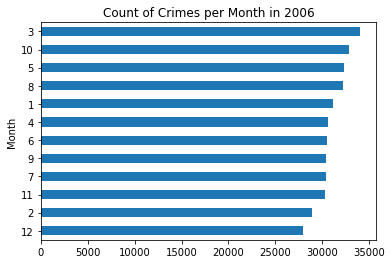

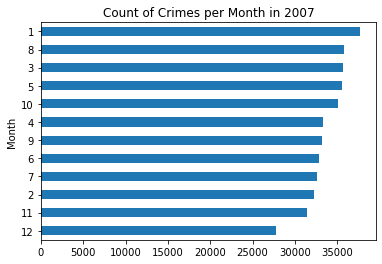

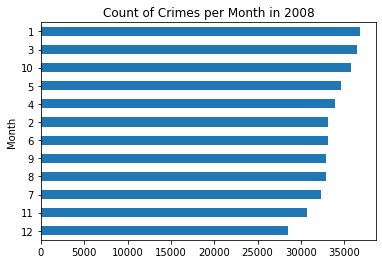

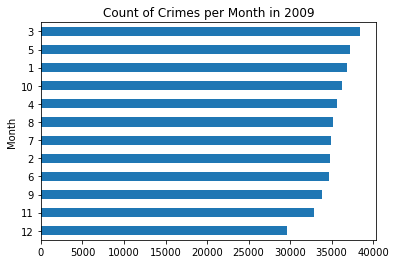

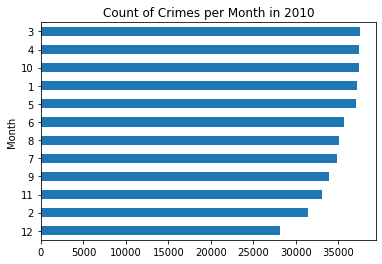

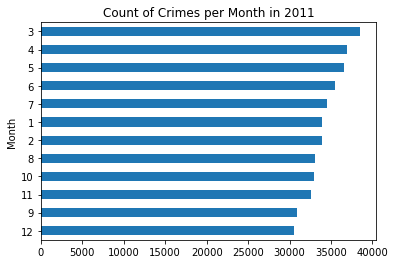

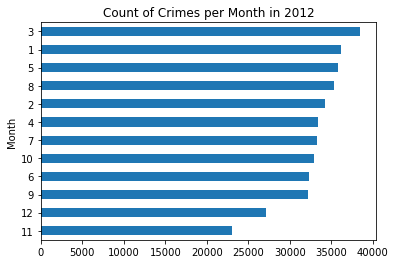

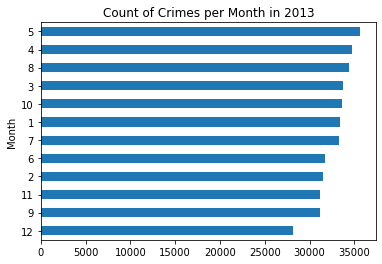

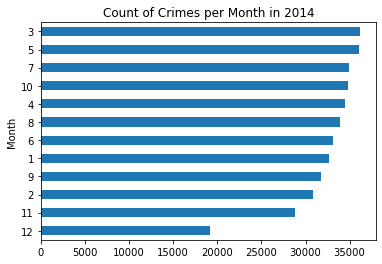

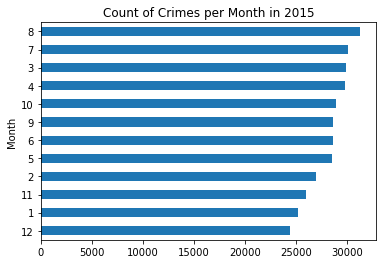

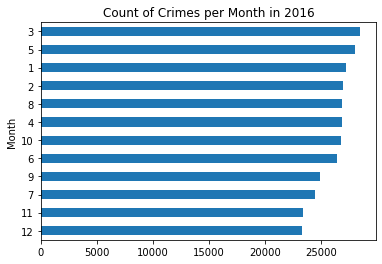

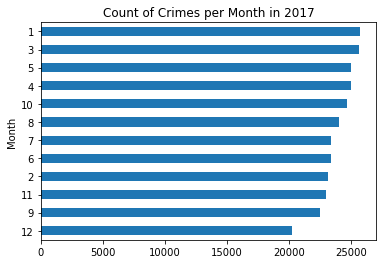

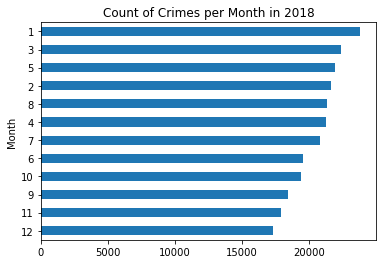

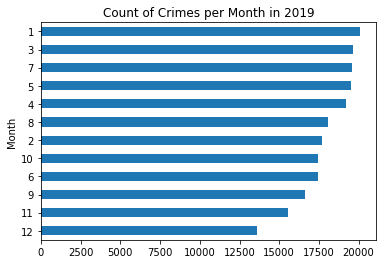

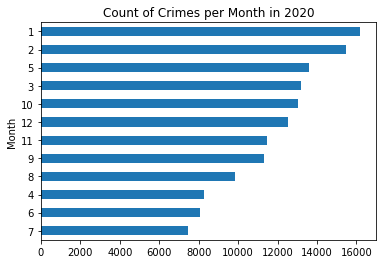

In [105]:
daily_crime = df.groupby('ARREST_DATE')["ARREST_DATE"].count()
#print(daily_crime)
crimes_per_year = df.groupby([df["ARREST_DATE"].dt.year])["ARREST_DATE"].count()
#print(crimes_per_year)
crimes_per_month = df.groupby([df["ARREST_DATE"].dt.year.rename("YEAR"), df["ARREST_DATE"].dt.month.rename("Month")])["ARREST_DATE"].count().sort_values()
for year in range(2006, 2021):
    model = crimes_per_month[year].plot(kind = "barh", title = f"Count of Crimes per Month in {str(year)}")
    plt.show()

Text(0.5, 1.0, 'Total Number of Crimes per Year')

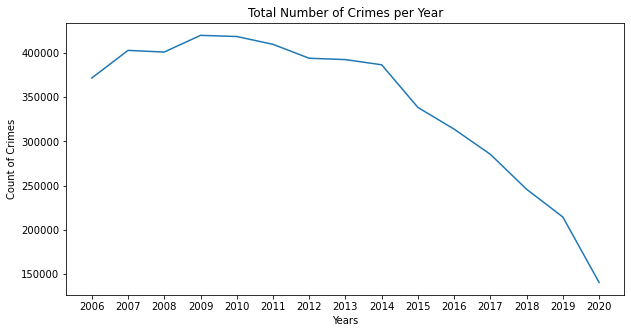

In [62]:
model = crimes_per_year.plot(kind = "line", xticks = crimes_per_year.index.values, figsize = (10, 5))
model.set_ylabel("Count of Crimes")
model.set_xlabel("Years")
model.set_title("Total Number of Crimes per Year")